# **QFT big square wave**

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import math
%matplotlib inline

In [3]:
# Set up the program
signal = QuantumRegister(8, name='signal')
qc = QuantumCircuit(signal)

In [4]:
def main():
    ## prepare the signal
    qc.h(signal);
    qc.rz(math.radians(180), signal[4]);

    qc.barrier()
    QFT(signal)

In [5]:
def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

/tmp/ipykernel_493/1370478442.py:8: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])


In [6]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

|8> (-0.635-0.062j) probability = 40.7069%
|24> (-0.206-0.062j) probability = 4.628%
|40> (-0.117-0.062j) probability = 1.7533%
|56> (-0.076-0.062j) probability = 0.962%
|72> (-0.051-0.062j) probability = 0.6445%
|88> (-0.033-0.062j) probability = 0.4933%
|104> (-0.019-0.062j) probability = 0.4205%
|120> (-0.006-0.062j) probability = 0.388%
|136> (0.006-0.063j) probability = 0.4005%
|152> (0.019-0.062j) probability = 0.4205%
|168> (0.033-0.062j) probability = 0.4933%
|184> (0.051-0.062j) probability = 0.6445%
|200> (0.076-0.062j) probability = 0.962%
|216> (0.117-0.062j) probability = 1.7533%
|232> (0.206-0.062j) probability = 4.628%
|248> (0.635-0.062j) probability = 40.7069%


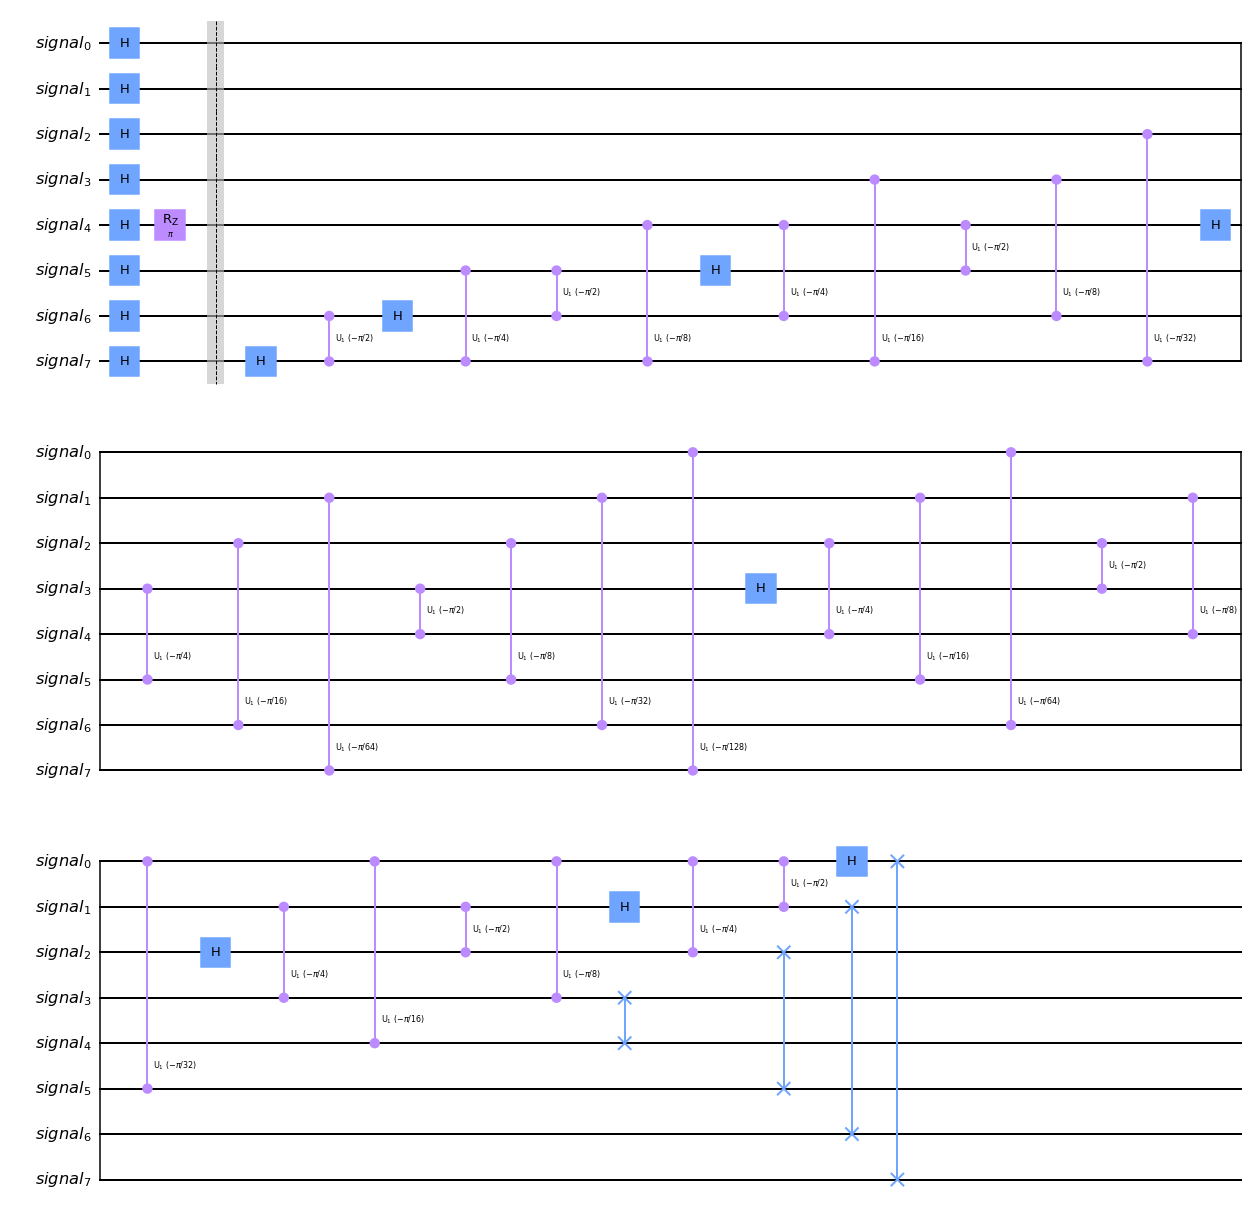

In [7]:
outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit